# 🧠 Rental Price Prediction with Regression

In this notebook, we conduct exploratory data analysis (EDA), feature engineering, and regression modeling on the rental apartment dataset collected via web scraping. The aim is to build a machine learning model that can accurately predict monthly rental prices based on features such as apartment size, number of rooms, and location.

📄 The dataset used here was obtained through the following notebook:  
👉 [Data Collection via Web Scraping](https://github.com/suzunn/Rental-Price-Prediction-in-Istanbul/blob/f58f867c090346559127b3925c6228fa43b9636b/notebooks/Zingat_Webscrap.ipynb)


# Install and Import Necessary Libraries
This section includes all the required libraries and dependencies needed for data processing, model training, and evaluation.

In [1]:
import pandas as pd  # Data handling and manipulation
import numpy as np  # Numerical operations

# Visualization libraries
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization

# Machine learning and model selection
from sklearn.model_selection import train_test_split  # Split dataset into training and test sets
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics

# Model imports
from xgboost import XGBRegressor  # XGBoost Regressor model
from sklearn.ensemble import RandomForestRegressor  # Random Forest Regressor model
from catboost import CatBoostRegressor  # CatBoost Regressor model

# Torch for deep learning
import torch  # For GPU computations and deep learning

# TabPFN for Tabular data regression
from tabpfn import TabPFNRegressor  # TabPFN model for tabular data regression

# Joblib for model persistence
import joblib  # For saving and loading models

# Check GPU availability for training
if not torch.cuda.is_available():  # Check if GPU is available for faster training
    raise SystemError('GPU device not found. For fast training, please enable GPU. See section above for instructions.')

# Load Data
Here, we load the dataset from a specified source and prepare it for further analysis and processing.


In [3]:
#If you are running in colab:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import our zingat house data
df = pd.read_csv("../data/raw/zingat_istanbul.csv", encoding="utf-8-sig")

# EDA (Exploratory Data Analysis)
In this phase, we explore the dataset to understand its structure, visualize distributions, and identify potential issues like missing values or outliers.

First 5 rows of the DataFrame:
                                       Listing_Title     County    Price  \
0  KOZYATAĞI'NDA MİNİBÜS CAD. YAKINI KİRALIK NET ...   Kadıköy,   55.000   
1         Selenium Twins Residence Kiralık 1+1 Daire  Beşiktaş,   60.000   
2  Selenium Twins Residence Kiralık Boğaz Manzara...  Beşiktaş,  150.000   
3  ATIŞALANI KEMER MAH. STADA YAKIN, BÜYÜK 2+1 10...   Esenler,   20.000   
4  Beyoğlu 1+1 Kiralık Daire Tarihi Binada Eşyalı...   Beyoğlu,   37.000   

  Net_Area_(m²)  Gross_Area_(m²) Room-Living_Room_Count Room_Count  \
0            83              100                    2+1          2   
1            70               96                    1+1          1   
2           180              270                    3+1          3   
3           100              110                    2+1          2   
4            80               90                    1+1          1   

  Bathroom_Count  Photo_Count  
0              1         36.0  
1              1         30

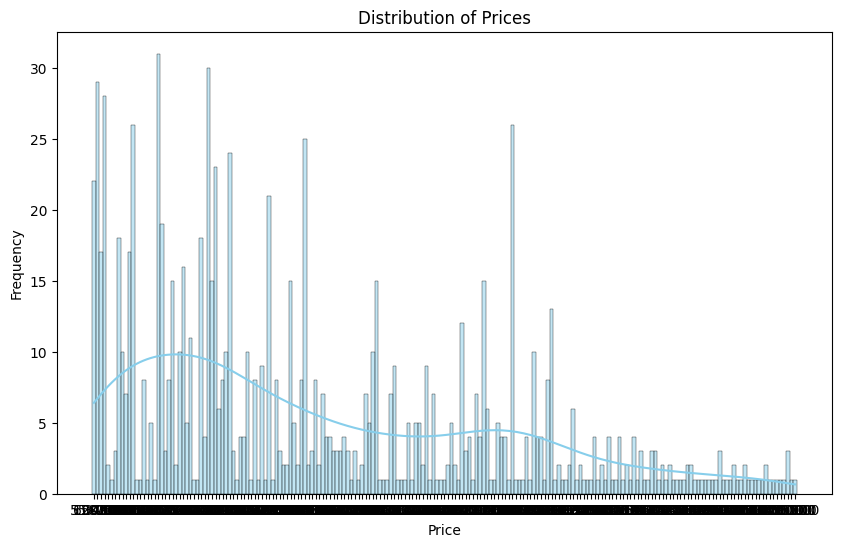


Unique Values in 'Net_Area_(m²)':


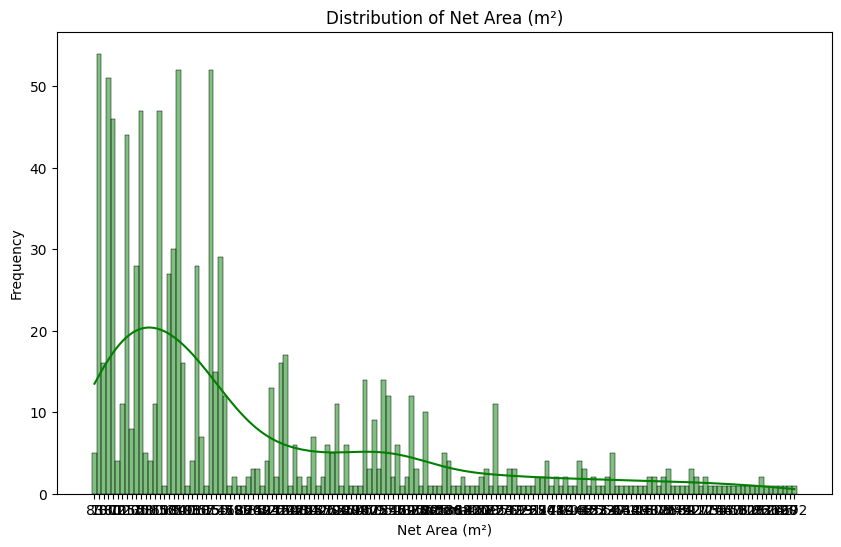


Unique Values in 'Room_Count':


C:\Users\uzun\AppData\Local\Temp\ipykernel_18564\1542686667.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Room_Count', palette='coolwarm')


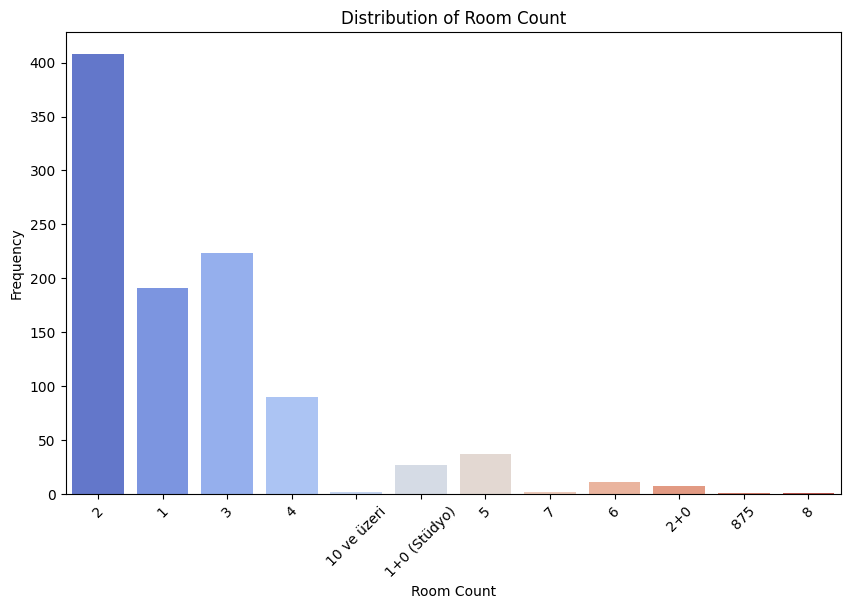


Unique Values in 'Room-Living_Room_Count':

Unique Values in 'Bathroom_Count':


C:\Users\uzun\AppData\Local\Temp\ipykernel_18564\1542686667.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Bathroom_Count', palette='viridis')


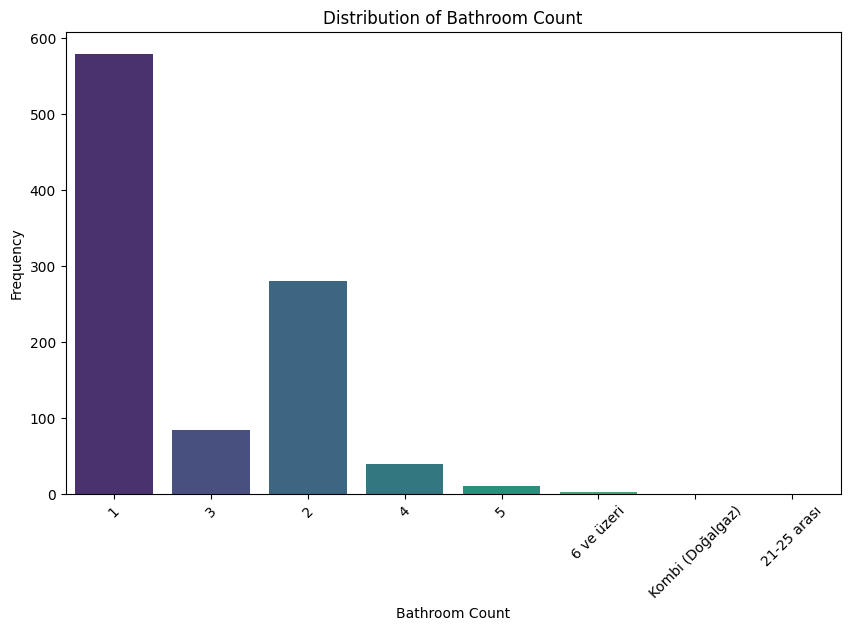


Unique Values in 'Photo_Count':


C:\Users\uzun\AppData\Local\Temp\ipykernel_18564\1542686667.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Photo_Count', palette='magma')


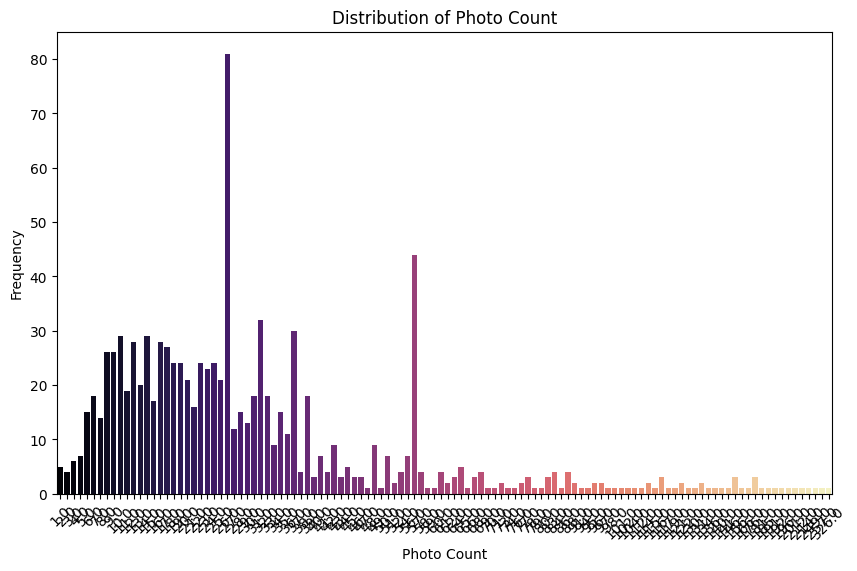


County Value Counts:


C:\Users\uzun\AppData\Local\Temp\ipykernel_18564\1542686667.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='County', palette='Set2', order=df['County'].value_counts().index)


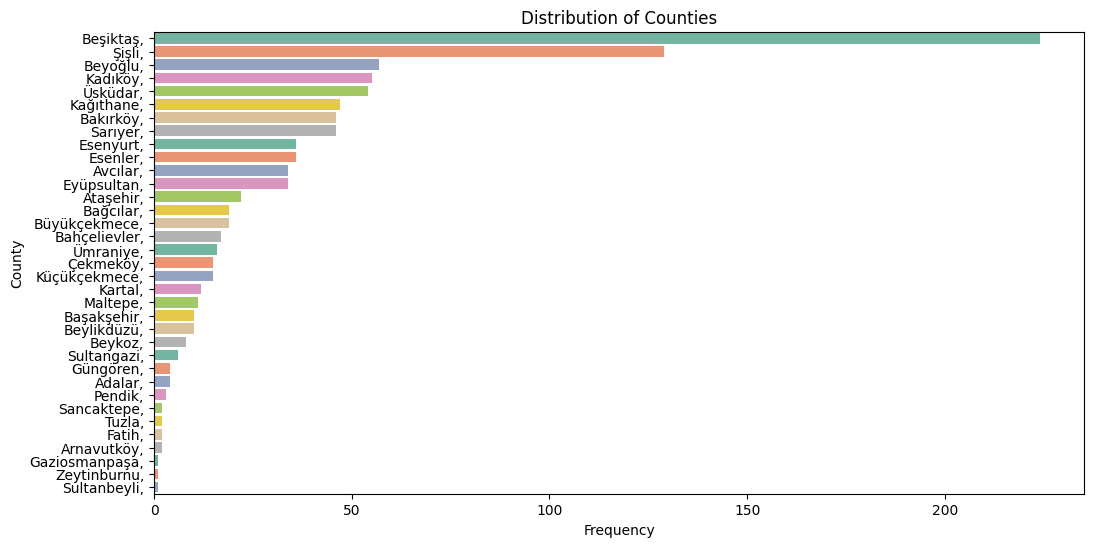

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Check the number of missing (NaN) values in each column
print("\nMissing values count in each column:")
print(df.isnull().sum())

# Display a concise summary of the DataFrame's structure, including data types and non-null counts
print("\nDataFrame info (structure and data types):")
df.info()

# Generate descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
print(df.describe())

# Checking the Columns and DataFrame Info
print("Columns in the DataFrame:")
df.columns  # List all column names

print("\nDataFrame Information:")
df.info()  # Summary of the DataFrame (data types, non-null count)

# Checking for Missing Values in the DataFrame
print("\nMissing Values in Each Column:")
df.isnull().sum()  # Count of missing values for each column

# Checking the Distribution of Prices
print("\nPrice Value Counts:")
df["Price"].value_counts()  # Count of each unique value in the 'Price' column

# **Visualization for Price Distribution**
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Checking Unique Values in 'Net Area (m²)'
print("\nUnique Values in 'Net_Area_(m²)':")
df["Net_Area_(m²)"].unique()  # Unique values in the 'Net_Area_(m²)' column

# **Visualization for Net Area (m²) Distribution**
plt.figure(figsize=(10, 6))
sns.histplot(df['Net_Area_(m²)'], bins=50, kde=True, color='green')
plt.title('Distribution of Net Area (m²)')
plt.xlabel('Net Area (m²)')
plt.ylabel('Frequency')
plt.show()

# Checking Unique Room Count Values
print("\nUnique Values in 'Room_Count':")
df["Room_Count"].unique()  # Unique values in the 'Room_Count' column

# **Visualization for Room Count Distribution**
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Room_Count', palette='coolwarm')
plt.title('Distribution of Room Count')
plt.xlabel('Room Count')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Checking Unique Values in 'Room-Living Room Count'
print("\nUnique Values in 'Room-Living_Room_Count':")
df["Room-Living_Room_Count"].unique()  # Unique values in the 'Room-Living_Room_Count' column

# Checking Unique Bathroom Count Values
print("\nUnique Values in 'Bathroom_Count':")
df["Bathroom_Count"].unique()  # Unique values in the 'Bathroom_Count' column

# **Visualization for Bathroom Count Distribution**
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Bathroom_Count', palette='viridis')
plt.title('Distribution of Bathroom Count')
plt.xlabel('Bathroom Count')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Checking Unique Photo Count Values
print("\nUnique Values in 'Photo_Count':")
df["Photo_Count"].unique()  # Unique values in the 'Photo_Count' column

# **Visualization for Photo Count Distribution**
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Photo_Count', palette='magma')
plt.title('Distribution of Photo Count')
plt.xlabel('Photo Count')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Checking the Distribution of Counties
print("\nCounty Value Counts:")
df["County"].value_counts()  # Count of each unique value in the 'County' column

# **Visualization for County Distribution**
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='County', palette='Set2', order=df['County'].value_counts().index)
plt.title('Distribution of Counties')
plt.xlabel('Frequency')
plt.ylabel('County')
plt.show()

# Feature Engineering
This step involves creating new features, transforming existing ones, and preparing the dataset to improve model performance.

In [4]:
# Clean the 'Price' column: remove 'TRY' text, remove '.' characters, and convert to integer
df["Price"] = df["Price"].str.replace(" TRY", "").str.replace(".", "").astype(int)

# Clean the 'Net_Area_(m²)' column: remove 'm²', convert to numeric type, and fill missing values with 0
df["Net_Area_(m²)"] = df["Net_Area_(m²)"].str.replace("m²", "", regex=False)
df["Net_Area_(m²)"] = pd.to_numeric(df["Net_Area_(m²)"], errors="coerce")  # Coerce invalid values to NaN
df["Net_Area_(m²)"].fillna(0, inplace=True)  # Fill NaN values with 0

# Remove commas from the 'County' column
df["County"] = df["County"].str.replace(",", "", regex=False)

# Fill missing values in the 'Photo_Count' column with 0
df["Photo_Count"].fillna(0, inplace=True)

# Transform special values in the 'Room_Count' column
df["Room_Count"].replace({"2+0": "2",  # Replace '2+0' with '2'
                          "1+0 (Stüdyo)": "1",  # Replace '1+0 (Studio)' with '1'
                          '10 ve üzeri': "12"}, inplace=True)  # Replace '10 ve üzeri' with '12'
df["Room_Count"] = df["Room_Count"].astype(int)  # Convert 'Room_Count' to integer
df = df[df["Room_Count"] != 875]  # Remove rows with 875


# Transform special values in the 'Bathroom_Count' column
df["Bathroom_Count"].replace({"21-25 arası": 23,  # Replace '21-25 arası' with 23
                               "36-40 arası": 38,  # Replace '36-40 arası' with 38
                               "1-5 arası": 3,  # Replace '1-5 arası' with 3
                               "6 ve üzeri": 8}, inplace=True)  # Replace '6 ve üzeri' with 8

# Remove rows with 'Kombi (Doğalgaz)' in the 'Bathroom_Count' column
df = df[df["Bathroom_Count"] != "Kombi (Doğalgaz)"]  # Remove rows with 'Kombi (Doğalgaz)'
df["Bathroom_Count"] = df["Bathroom_Count"].astype(int)  # Convert 'Bathroom_Count' to integer
df = df[df["Bathroom_Count"] != 23]  # Remove rows with 23

# Fill missing values in the 'Photo_Count' column with 0 again and convert to integer
df["Photo_Count"].fillna(0, inplace=True)
df["Photo_Count"] = df["Photo_Count"].astype(int)

# Create new features: Area ratio, Net area per room, and Area loss
df['Area_ratio'] = df['Net_Area_(m²)'] / df['Gross_Area_(m²)']  # Calculate the area ratio
df['NetArea_per_Room'] = df['Net_Area_(m²)'] / df['Room_Count']  # Calculate net area per room
df['Area_Loss'] = df['Gross_Area_(m²)'] - df['Net_Area_(m²)']  # Calculate area loss

# Identify if the property is a studio (1+0)
df['Is_Studio'] = df['Room-Living_Room_Count'].str.strip() == '1+0 (Stüdyo)'  # Identify if it's a studio
df['Is_Studio'] = df['Is_Studio'].astype(int)  # Convert to binary (1 for Studio, 0 otherwise)

# Extract room and living room counts separately from 'Room-Living_Room_Count'
df['Room_Count_Extracted'] = df['Room-Living_Room_Count'].str.extract(r'^(\d+)').astype(float).astype('Int64')  # Extract room count
df['Living_Room_Count'] = df['Room-Living_Room_Count'].str.extract(r'\+(\d+)').astype(float).astype('Int64')  # Extract living room count

# Calculate total rooms (Room Count + Living Room Count)
df['Total_Rooms'] = df['Room_Count_Extracted'].fillna(0) + df['Living_Room_Count'].fillna(0)  # Sum rooms and living rooms

# Outiler Analysis
Here, we identify and analyze outliers in the dataset that may affect model performance, and decide whether to remove or handle them.

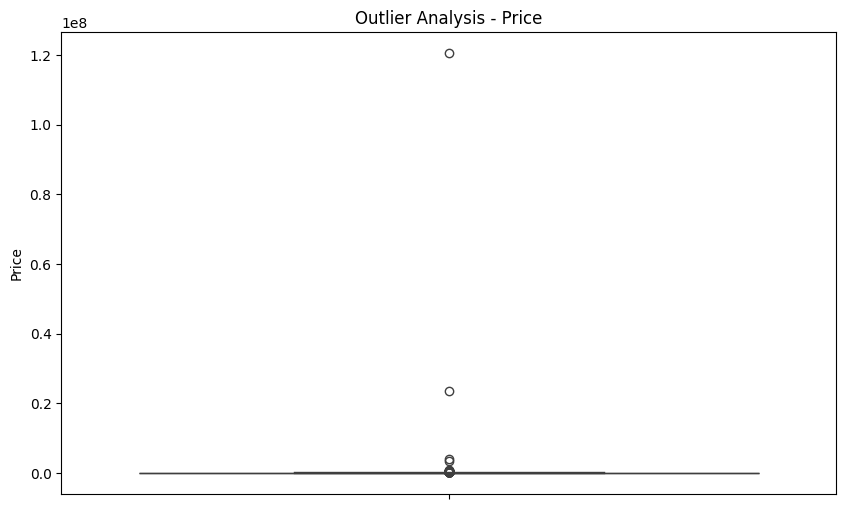

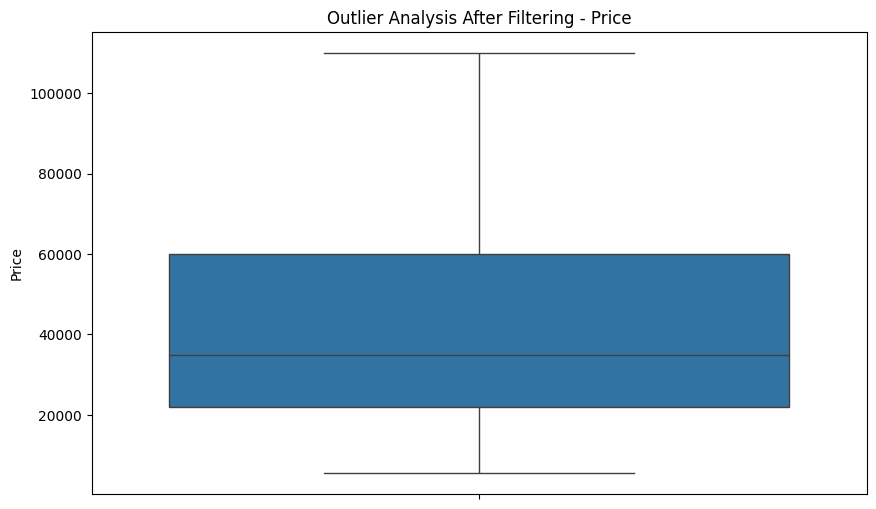

In [5]:
# Visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Price'])
plt.title('Outlier Analysis - Price')
plt.show()

# Manual filtering - Remove values above 110000
manual_upper_limit = 110000
df = df[df['Price'] <= manual_upper_limit]

# Visualize outliers after filtering
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Price'])
plt.title('Outlier Analysis After Filtering - Price')
plt.show()

# Save Cleaned Data
After cleaning and preprocessing, we save the dataset for later use, ensuring we don't lose any important transformations.

In [8]:
# Apply one-hot encoding to the 'County' column, dropping the first category to avoid multicollinearity
cleaned_data = pd.get_dummies(df, columns=["County"], drop_first=True)

# Drop unnecessary columns that will not be used in the model
cleaned_data.drop(columns=["Listing_Title", "Room-Living_Room_Count", "Photo_Count", 'Room_Count_Extracted'], inplace=True)

# Save the cleaned DataFrame to a CSV file
cleaned_data.to_csv("zingat_istanbul_cleaned.csv", index=False)

# Display the first few rows of the cleaned DataFrame
cleaned_data.head()

,Price,Net_Area_(m²),Gross_Area_(m²),Room_Count,Bathroom_Count,Area_ratio,NetArea_per_Room,Area_Loss,Is_Studio,Living_Room_Count,...,County_Sancaktepe,County_Sarıyer,County_Sultanbeyli,County_Sultangazi,County_Tuzla,County_Zeytinburnu,County_Çekmeköy,County_Ümraniye,County_Üsküdar,County_Şişli
0,55000,83.0,100,2,1,0.830000,41.500000,17.0,0,1,...,False,False,False,False,False,False,False,False,False,False
1,60000,70.0,96,1,1,0.729167,70.000000,26.0,0,1,...,False,False,False,False,False,False,False,False,False,False
3,20000,100.0,110,2,2,0.909091,50.000000,10.0,0,1,...,False,False,False,False,False,False,False,False,False,False
4,37000,80.0,90,1,1,0.888889,80.000000,10.0,0,1,...,False,False,False,False,False,False,False,False,False,False
5,82000,100.0,130,3,1,0.769231,33.333333,30.0,0,1,...,False,False,False,False,False,False,False,False,False,False


# Modelling
In this section, we train different machine learning models on the data, comparing their performance to determine the best approach.

## Model Comparison
Here, we compare multiple models using relevant metrics like RMSE and R², and select the most effective one.

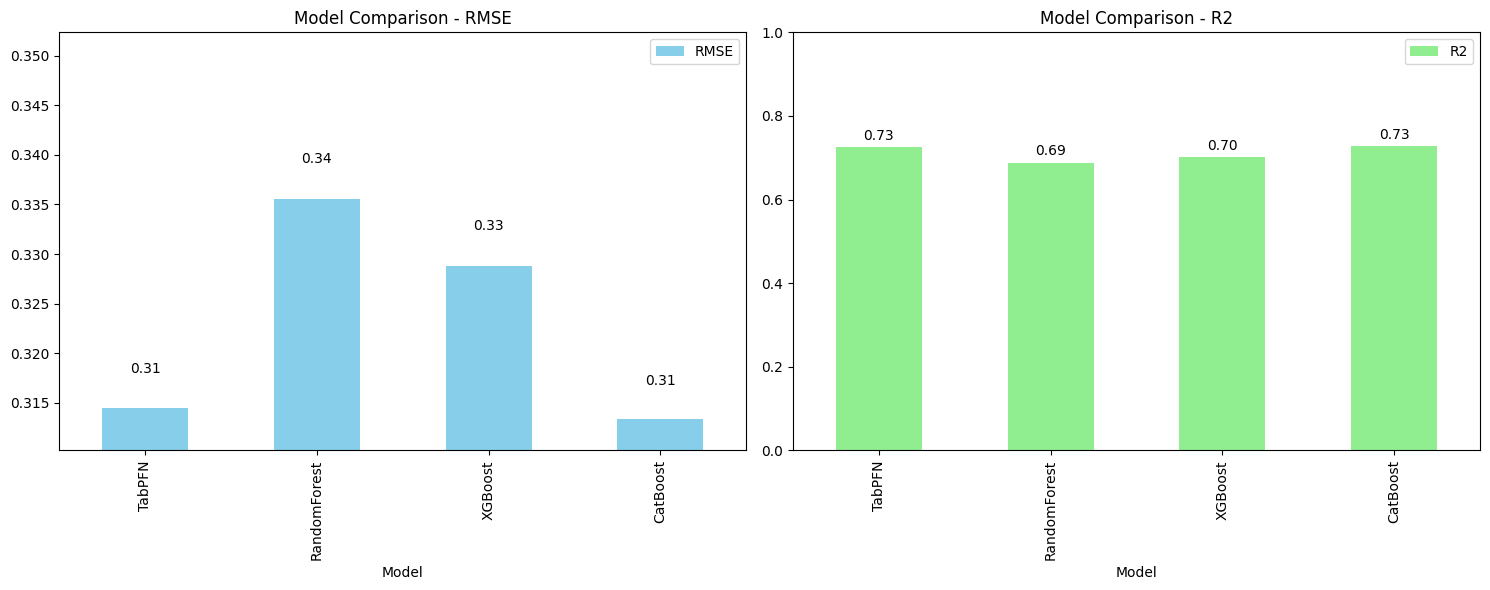

In [6]:
# Load the dataset (you will need to use your own file path here)
df = pd.read_csv("../data/processed/zingat_istanbul_cleaned.csv", encoding="utf-8-sig")

# Separate the target variable (Price) and features
X = df.drop(columns=["Price"])  # Features
y = np.log1p(df['Price'])  # Target variable, log-transformed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# List of models to be used
models = [
    ('TabPFN', TabPFNRegressor(random_state=42)),
    ('RandomForest', RandomForestRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('CatBoost', CatBoostRegressor(random_state=42, verbose=0))
]

results = []  # List to store the results for each model

# Train and test each model, then calculate the scores
for name, model in models:
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    r2 = r2_score(y_test, y_pred)  # Calculate R2 score
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculate RMSE

    # Store the results in a list
    results.append({'Model': name, 'RMSE': rmse, 'R2': r2})

# Convert results to a DataFrame for easier visualization
score_df = pd.DataFrame(results)

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot RMSE comparison
score_df.plot(x='Model', y='RMSE', kind='bar', ax=ax[0], color='skyblue', title='Model Comparison - RMSE')
ax[0].set_ylim(score_df['RMSE'].min() * 0.99, score_df['RMSE'].max() * 1.05)

# Annotate RMSE values above the bars
for i, v in enumerate(score_df['RMSE']):
    ax[0].text(i, v + 0.01 * v, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

# Plot R2 comparison
score_df.plot(x='Model', y='R2', kind='bar', ax=ax[1], color='lightgreen', title='Model Comparison - R2')
ax[1].set_ylim(0, 1)

# Annotate R2 values above the bars
for i, v in enumerate(score_df['R2']):
    ax[1].text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

# Tight layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

## Ensemble Model with the Best Models
This step involves combining the best-performing models to create an ensemble, improving predictions by leveraging the strengths of each model.

In [7]:
# Create the models
tabpfn_model = TabPFNRegressor(random_state=42)  # TabPFN model
catboost_model = CatBoostRegressor(random_state=42, verbose=0)  # CatBoost model

# Train both models
tabpfn_model.fit(X_train, y_train)  # Train the TabPFN model
catboost_model.fit(X_train, y_train)  # Train the CatBoost model

# Make predictions with both models
tabpfn_pred = tabpfn_model.predict(X_test)  # Predictions from TabPFN model
catboost_pred = catboost_model.predict(X_test)  # Predictions from CatBoost model

# Take the average of the predictions (ensemble method)
ensemble_pred = (tabpfn_pred + catboost_pred) / 2  # Ensemble prediction by averaging the models' predictions

# Calculate R2 and RMSE for the ensemble model
r2 = r2_score(y_test, ensemble_pred)  # R2 score
rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred))  # RMSE (Root Mean Squared Error)

# Print the results
print(f"Ensemble Model - R2: {r2:.4f}")  # Print R2 score
print(f"Ensemble Model - RMSE: {rmse:.4f}")  # Print RMSE

# Save the trained models to disk
joblib.dump(catboost_model, "catboost_model.pkl")  # Save the CatBoost model
joblib.dump(tabpfn_model, "tabpfn_model.pkl")  # Save the TabPFN model

Ensemble Model - R2: 0.7410
Ensemble Model - RMSE: 0.3059


['tabpfn_model.pkl']

# Testing Our Model with Our Own Data
Finally, we test our trained ensemble model using our own input data, making predictions and assessing its performance in real-world scenarios.

In [8]:
# Load the TabPFN and CatBoost models
tabpfn_loaded = joblib.load("tabpfn_model.pkl")  # Load the TabPFN model
catboost_loaded = joblib.load("catboost_model.pkl")  # Load the CatBoost model

def ensemble_predict_house_price(county, net_area, gross_area, room_living_str, bathroom_count, is_studio, models, feature_columns):
    # Create a DataFrame using the input values from the user and perform feature engineering
    df = pd.DataFrame([{
        "County": county,  # The county of the property
        "Net Area (m²)": net_area,  # The net area of the property in square meters
        "Gross Area (m²)": gross_area,  # The gross area of the property in square meters
        "Room-Living Room Count": room_living_str,  # The room count in the property (room and living room combined)
        "Bathroom Count": bathroom_count,  # The number of bathrooms
        "Is_Studio": int(is_studio)  # Is the property a studio (1 for yes, 0 for no)
    }])

    # Feature engineering: Extract room count, calculate area ratios, and extract additional features
    df['Room Count'] = df['Room-Living Room Count'].str.extract(r'^(\d+)').astype(int)
    df['Area_ratio'] = df['Net Area (m²)'] / df['Gross Area (m²)']
    df['NetArea_per_Room'] = df['Net Area (m²)'] / df['Room Count']
    df['Area_Loss'] = df['Gross Area (m²)'] - df['Net Area (m²)']
    df['Room_Count_Extracted'] = df['Room-Living Room Count'].str.extract(r'^(\d+)').astype(float).astype('Int64')
    df['Living_Room_Count'] = df['Room-Living Room Count'].str.extract(r'\+(\d+)').astype(float).astype('Int64')
    df['Total_Rooms'] = df['Room_Count_Extracted'].fillna(0) + df['Living_Room_Count'].fillna(0)

    # Create county-related dummy variables
    for col in [c for c in feature_columns if c.startswith("County_")]:
        df[col] = 0  # Set all county columns to 0 initially
    county_col = f"County_{county}"  # Construct the county column name (e.g., 'County_Istanbul')
    if county_col in df.columns:
        df[county_col] = 1  # Set the corresponding county column to 1

    df = df.reindex(columns=feature_columns, fill_value=0)  # Reindex to match feature columns, filling missing columns with 0

    # Make predictions with each model and calculate the average
    predictions = [np.expm1(model.predict(df)[0]) for model in models]  # Exponentiate the predictions back to original scale
    final_prediction = np.mean(predictions)  # Calculate the average of predictions from both models

    # Calculate the prediction range (± 20% from the predicted value)
    final_lower = np.mean([np.expm1(model.predict(df)[0] - 0.2) for model in models])  # Lower bound of the prediction
    final_upper = np.mean([np.expm1(model.predict(df)[0] + 0.2) for model in models])  # Upper bound of the prediction

    # Print the individual model predictions and their ranges
    for model, pred in zip(models, predictions):
        lower = np.expm1(model.predict(df)[0] - 0.2)  # Lower bound for this model
        upper = np.expm1(model.predict(df)[0] + 0.2)  # Upper bound for this model
        print(f"{model.__class__.__name__} Prediction: {pred:,.0f} TL (± {pred - lower:,.0f})")
        print(f"Range: {lower:,.0f} TL - {upper:,.0f} TL")

    # Print the ensemble model prediction and its range
    print(f"Ensemble Model Prediction: {final_prediction:,.0f} TL (± {final_prediction - final_lower:,.0f})")
    print(f"Ensemble Range: {final_lower:,.0f} TL - {final_upper:,.0f} TL")

    return final_prediction, final_lower, final_upper  # Return the final prediction and its range

In [9]:
# Call the function with your provided inputs
ensemble_predict_house_price(
    county="Fatih",
    net_area=90,
    gross_area=105,
    room_living_str="1+0",
    bathroom_count=1,
    is_studio=False,
    models=[tabpfn_loaded, catboost_loaded],
    feature_columns=X_train.columns.tolist()
)

TabPFNRegressor Prediction: 25,329 TL (± 4,592)
Range: 20,738 TL - 30,937 TL
CatBoostRegressor Prediction: 31,305 TL (± 5,675)
Range: 25,630 TL - 38,236 TL
Ensemble Model Prediction: 28,317 TL (± 5,133)
Ensemble Range: 23,184 TL - 34,587 TL


(28316.882363331984, 23183.721482032975, 34586.54011483086)